In [35]:
import cv2
import numpy as np

img  = cv2.imread("iron/03.jpg")
cv2.namedWindow("display", cv2.WINDOW_NORMAL)
cv2.imshow('display',img)
cv2.waitKey(0)
#img = cv2.medianBlur(img,5)
print(img.shape)

(3056, 1988, 3)


In [36]:
# Convert existing image to HSV Color Palette
hsv_image = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

In [37]:
# For white color
max_white = np.array([0,0,255])
min_white = np.array([0,0,230])
mask_white = cv2.inRange(hsv_image, min_white, max_white)

# For Black Color
max_black = np.array([0,0,2])
min_black = np.array([0,0,0])
mask_black = cv2.inRange(hsv_image, min_black, max_black)
#final_mask = cv2.bitwise_or(mask_white, mask_black)
final_mask = mask_white

In [38]:
res = cv2.bitwise_and(img,img, mask=final_mask)

In [39]:
cv2.imshow('frame',img)
cv2.imshow('mask',final_mask)
cv2.imshow('res',res)
cv2.waitKey(0)

-1

In [40]:
contours, hierarchy = cv2.findContours(final_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

In [41]:
copy_img = img.copy()

In [42]:
cv2.drawContours(copy_img, contours, -1, (0,255,0), 1)

array([[[  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0],
        ...,
        [ 77,  84,  77],
        [ 77,  84,  77],
        [ 77,  84,  77]],

       [[  0, 255,   0],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [ 76,  83,  76],
        [ 76,  83,  76],
        [ 76,  83,  76]],

       [[  0, 255,   0],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [ 80,  87,  80],
        [ 80,  87,  80],
        [ 80,  87,  80]],

       ...,

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]]

In [43]:
cv2.imshow('copy_img',copy_img)
cv2.waitKey(0)

-1

In [29]:
sorted_contours = sorted(contours, key=cv2.contourArea, reverse=True)
i=0
for c in sorted_contours:
    x,y,w,h = cv2.boundingRect(c)
    ROI = img[y:y+h, x:x+w]
    cv2.imwrite("test_1/%d.png"%i,ROI)
    i+=1

In [44]:
area = []
for c in sorted_contours:
    area.append(cv2.contourArea(c))

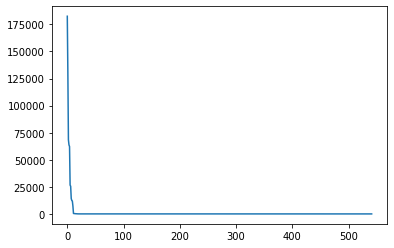

In [48]:
from matplotlib import pyplot as plt
plt.plot(area)

In [49]:
np.mean(area)

1120.7693726937268

In [55]:
new_area = [i for i in area if i > np.mean(area)]

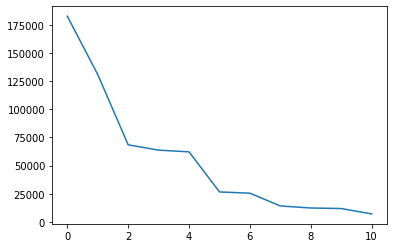

In [51]:
plt.plot(new_area)